In [1]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import torch

sns.set()

sys.path.append('..')
from src.utils.factory import read_yaml
from src.dataset.dataset import MakeDataset
from src.models.networks import read_model

In [15]:
cfg = read_yaml(fpath='../src/config/config.yaml')
cfg.MODEL.VISUALIZE = True
cfg.INITIALIZER.S_SIGMA = 1.0
data = 'toy'

In [19]:
if data == 'mnist':
    X_train, X_test, y_train, y_test = MakeDataset(cfg).get_tensor()
    x = X_train[0].view(784)
    x = x / np.linalg.norm(x)
elif data == 'toy':
    x = [0] * 784
    for i in range(len(x)):
        if 98*2 <= i <= 98*6:
            x[i] = 1
    x = torch.Tensor(x) / np.linalg.norm(x)

x_cuda = x.to(f'cuda:{cfg.GENERAL.GPUS[0]}')

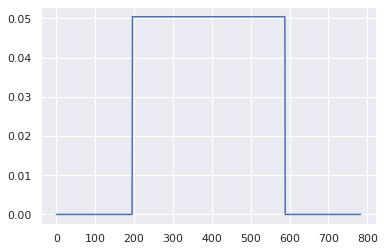

In [20]:
plt.plot(x);

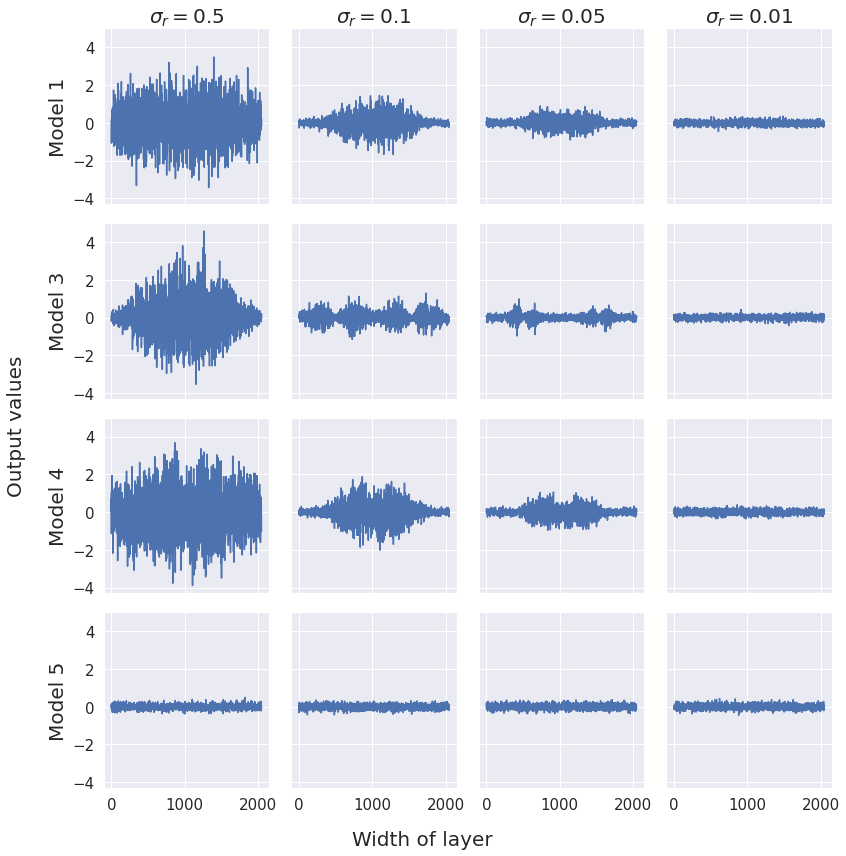

In [21]:
r_sigma_list = [0.5, 0.1, 0.05, 0.01]
arch_types = ['gaussian', 'mexican', 'matern', 'vanilla']
arch_legends = ['Model 1', 'Model 3', 'Model 4', 'Model 5']

fig, ax = plt.subplots(4, 4, figsize=(12, 12), sharex=True, sharey=True)
for i, (arch, led) in enumerate(zip(arch_types, arch_legends)):
    cfg.INITIALIZER.TYPE = arch
    for j, r_sigma in enumerate(r_sigma_list):
        cfg.INITIALIZER.R_SIGMA = r_sigma
        cfg.INITIALIZER.M_SIGMA = r_sigma
        
        net = read_model(cfg)
        h1 = net(x_cuda)
        h1 = h1.cpu().detach().numpy()

        ax[i][j].plot(h1)
        ax[i][j].tick_params(axis='both', which='major', labelsize=15)
        if j == 0:
            ax[i][j].set_ylabel(led, fontsize=20)
        if i == 0:
            ax[i][j].set_title('$\sigma_r=$'+str(r_sigma), fontsize=20)

fig.supxlabel('Width of layer', fontsize=20)
fig.supylabel('Output values', fontsize=20)
plt.tight_layout()